In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

ModuleNotFoundError: No module named 'pandas'

# SGD - Stochastic Gradient Descent
weights change after every sample, converges faster tha regular gradient descent
Pros:

    frequent model update thus, converges fast
    requires less memory

Cons:

    the path to reach the minima is noiser
    high varience during convergence


# Mini-batch Gradient Descent

Features:

    Updates the weight after every n training samples.
    It attempts to take best of both Stochastic and batch gradient descent

In [ ]:
#Define classifier
class Regressor(nn.Module):
    
    def __init__(self):
        # Inherient from parent pytorch class
        super().__init__()
        #perform operations in sequence
        #use sigmoid activation function
        self.model = nn.Sequential(
          nn.Linear(4, 3),
          nn.Sigmoid(),

          nn.Linear(3, 2),
          nn.Sigmoid(),

          nn.Linear(2, 1),
      )
        self.forward_pass_counter=0
        self.running_loss=[]
        #Loss function is MSE for regression problem
        self.loss_function = nn.MSELoss()
        
        #Use stochastic gradient descent as optimizer 
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
    def forward(self, inputs):
      return self.model(inputs)

        
    def train(self, inputs, targets):
    # calculate output of n/w
      outputs = self.forward(inputs)

      # initialize the gradients to zero; otherwise it will accumulate on each pass
      self.optimiser.zero_grad()
      
      # generate loss
      loss = self.loss_function(outputs, targets)


      #backward pass
      loss.backward()

      #update the weight
      self.optimiser.step()

      self.forward_pass_counter+=1
      
      #why do we need to keep running loss?
      self.running_loss.append(loss.item())

      if (self.forward_pass_counter % 10==0):
        print('the forward pass counter is ', self.forward_pass_counter)
        print('the loss ', loss.item())

    def plot_progress(self):
      df = pd.DataFrame(self.running_loss, columns=['loss'])
      df.plot( grid=True)
      pass



     
    
      pass

In [ ]:
#Read sample file
df=pd.read_csv('AAPL.csv')
print(df.columns)
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099874  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094663  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087715  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089886   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092492   73449600


In [ ]:
#remove null values
df['Next_day']=df['Close'].shift(-1)
df=df.dropna()

In [ ]:
# convert to numpy
x_numpy= df[['Open', 'High',
       'Low', 'Close', ]].to_numpy()
y_numpy=df['Next_day'].to_numpy()
print(x_numpy[0])
print(y_numpy[0])

[0.128348 0.128906 0.128348 0.128348]
0.121652


In [ ]:
# convert to tensor
from torch.utils.data import Dataset, TensorDataset, DataLoader

x_tensor = torch.from_numpy(x_numpy).float()
y_tensor = torch.from_numpy(y_numpy).float()
train_dataset=TensorDataset(x_tensor,y_tensor)
print(train_dataset[0])

(tensor([0.1283, 0.1289, 0.1283, 0.1283]), tensor(0.1217))


In [ ]:
# create the training data with batch size of 5
train_loader = DataLoader(dataset=train_dataset, batch_size=5)

In [ ]:
#call our classifier
regressor=Regressor()

In [ ]:
for i, data in enumerate(train_loader, 0):
  inputs, labels=data
  print (inputs)
  print(inputs.size())
  print(labels)
  print(labels.size())
  break

tensor([[0.1283, 0.1289, 0.1283, 0.1283],
        [0.1222, 0.1222, 0.1217, 0.1217],
        [0.1133, 0.1133, 0.1127, 0.1127],
        [0.1155, 0.1161, 0.1155, 0.1155],
        [0.1189, 0.1194, 0.1189, 0.1189]])
torch.Size([5, 4])
tensor([0.1217, 0.1127, 0.1155, 0.1189, 0.1261])
torch.Size([5])


In [ ]:
for i, data in enumerate(train_loader, 0):
  inputs, labels=data
  regressor.train(inputs,torch.unsqueeze(labels,1))


the forward pass counter is  10
the loss  0.01038053072988987
the forward pass counter is  20
the loss  0.008770903572440147
the forward pass counter is  30
the loss  0.0032208370976150036
the forward pass counter is  40
the loss  3.5754455893766135e-05
the forward pass counter is  50
the loss  0.0002720581542234868
the forward pass counter is  60
the loss  0.00011554577940842137
the forward pass counter is  70
the loss  4.8967434850055724e-05
the forward pass counter is  80
the loss  0.0003067375801037997
the forward pass counter is  90
the loss  0.000156311274622567
the forward pass counter is  100
the loss  0.004568872507661581
the forward pass counter is  110
the loss  0.01217295229434967
the forward pass counter is  120
the loss  0.01196239609271288
the forward pass counter is  130
the loss  0.004558279644697905
the forward pass counter is  140
the loss  0.00016298839182127267
the forward pass counter is  150
the loss  0.002387935994192958
the forward pass counter is  160
the loss

the forward pass counter is  1400
the loss  0.9303825497627258
the forward pass counter is  1410
the loss  0.052421241998672485
the forward pass counter is  1420
the loss  0.01739790290594101
the forward pass counter is  1430
the loss  0.030995666980743408
the forward pass counter is  1440
the loss  0.013678033836185932
the forward pass counter is  1450
the loss  0.011626188643276691
the forward pass counter is  1460
the loss  0.004580032546073198
the forward pass counter is  1470
the loss  3.035167694091797
the forward pass counter is  1480
the loss  7.7341108322143555
the forward pass counter is  1490
the loss  9.052352905273438
the forward pass counter is  1500
the loss  0.054880786687135696
the forward pass counter is  1510
the loss  0.17405369877815247
the forward pass counter is  1520
the loss  0.0870039314031601
the forward pass counter is  1530
the loss  0.09180251508951187
the forward pass counter is  1540
the loss  0.27168169617652893
the forward pass counter is  1550
the los

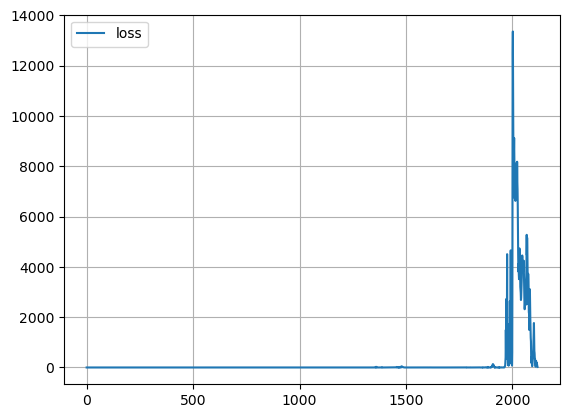

In [ ]:
regressor.plot_progress()